In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Retina 
%config InlineBackend.figure_format = 'retina'
import time
import random
import pandas as pd
import tracemalloc

In [66]:
def generate_2d_plot(dataset,query,kcn_points):
    plt.scatter(dataset[:, 0] ,dataset[:, 1],color='blue')

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Scatter plot of 2D Dataset')
    plt.scatter(query[0], query[1], color='red')
    plt.scatter(kcn_points[:,0], kcn_points[:,1], color='orange')
    plt.show()

In [51]:
def print_table(dataset,query,distances):
    df = pd.DataFrame(dataset, columns=['X1', 'X2'])
    df["query_distance"] = distances
    print(df)

In [52]:
def pairwise_dist_numpy(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.sqrt(np.sum((x - y)**2))

In [53]:
def knn_naive(dataset,query,k):
    dist=np.array([pairwise_dist_numpy(query,x) for x in dataset])
    
    indices_sorted=np.argsort(dist)
    
    dist_sorted=np.array([dist[i] for i in indices_sorted])
    kcn_distances=dist_sorted[:k]
    kcn_indices=indices_sorted[:k]
    kcn_points=np.array([dataset[i] for i in indices_sorted])[:k]
    
    return kcn_distances ,kcn_indices ,kcn_points
    
    
    

In [54]:
N=100
D=2
k=10
training_time=[]
testing_time=[]
dataset,query=generate_random(N,D)


In [55]:
kcn_distances ,kcn_indices ,kcn_points=knn_naive(dataset,query,k)

In [56]:
print(kcn_distances)
print(kcn_indices)
print(kcn_points)

[0.05535462 0.06056959 0.0723378  0.08031812 0.11200597 0.14651013
 0.18900693 0.20908003 0.22526389 0.23762466]
[ 6 11 68 97 94  2 46 13 24 79]
[[0.008342   0.38758323]
 [0.00513004 0.36865258]
 [0.00115669 0.34792959]
 [0.04920939 0.463453  ]
 [0.14517703 0.46119315]
 [0.12431038 0.51777876]
 [0.10202973 0.56949617]
 [0.07148318 0.17550424]
 [0.04120902 0.16028827]
 [0.28166521 0.47886113]]


In [57]:
print_table(kcn_points,query,kcn_distances)

         X1        X2  query_distance
0  0.008342  0.387583        0.055355
1  0.005130  0.368653        0.060570
2  0.001157  0.347930        0.072338
3  0.049209  0.463453        0.080318
4  0.145177  0.461193        0.112006
5  0.124310  0.517779        0.146510
6  0.102030  0.569496        0.189007
7  0.071483  0.175504        0.209080
8  0.041209  0.160288        0.225264
9  0.281665  0.478861        0.237625


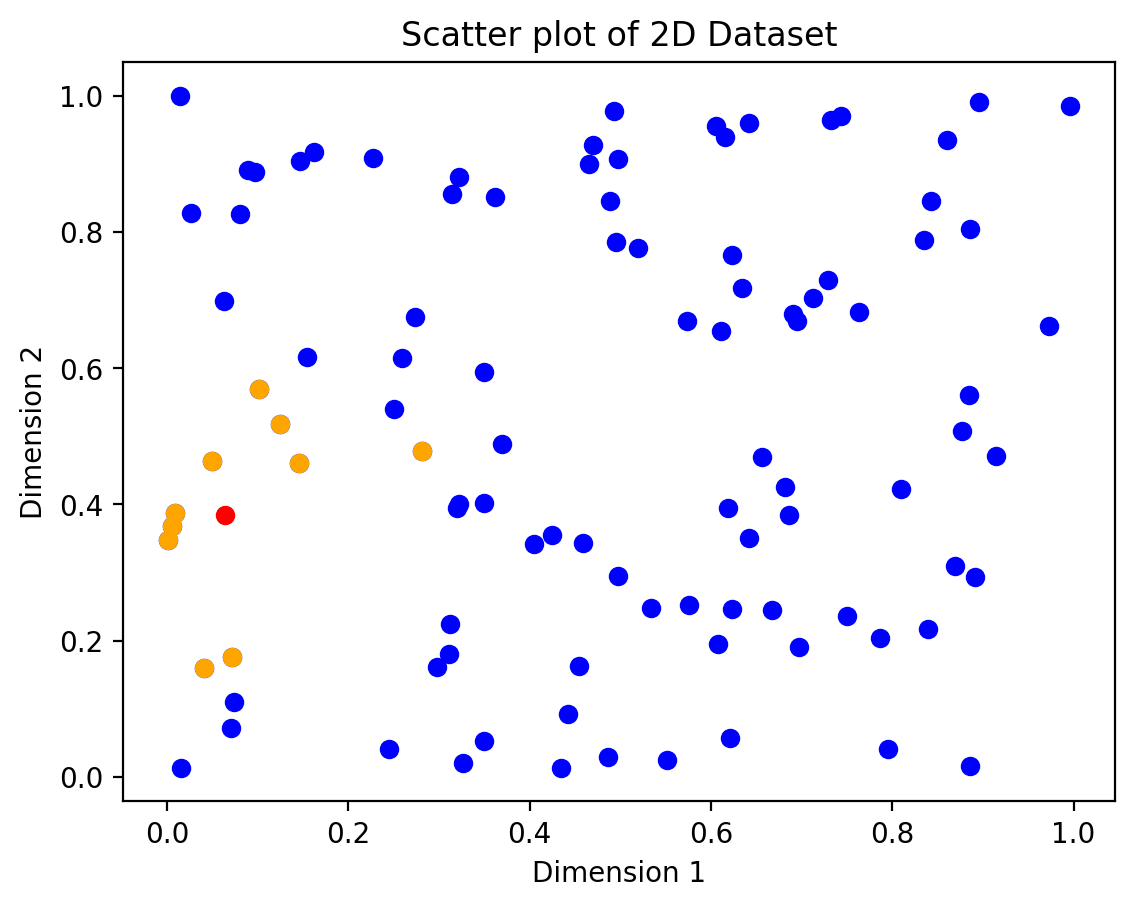

In [67]:
generate_2d_plot(dataset,query,kcn_points)

In [60]:
def naive_knn(data, query_point, k):
    # Calculate distances to all points
    distances = np.linalg.norm(data - query_point, axis=1)
    # Find indices of k nearest neighbors
    return np.argsort(distances)[:k]

In [61]:
def compare_naive_knn(N_values, D_values, k):
    results = []
    for N in N_values:
        for D in D_values:
            # Generate random dataset and query point
            data = np.random.rand(N, D)
            query_point = np.random.rand(D)

            # Measure training time (negligible for naive KNN)
            tracemalloc.start()
            start_time = time.time()
            training_memory = tracemalloc.get_traced_memory()[1]  # Peak memory
            training_time = time.time() - start_time
            tracemalloc.stop()

            # Measure testing time and memory
            tracemalloc.start()
            start_time = time.time()
            _ = naive_knn(data, query_point, k)
            testing_time = time.time() - start_time
            testing_memory = tracemalloc.get_traced_memory()[1]  # Peak memory
            tracemalloc.stop()

            # Store results
            results.append({
                'N': N,
                'D': D,
                'K': k,
                'training_time': training_time,
                'testing_time': testing_time,
                'training_memory': training_memory,
                'testing_memory': testing_memory
            })
    return results


In [62]:
# Parameters
N_values = [100, 200, 500, 1000,  2500,3000, 4000, 5000]
D_values = [2, 5, 10, 20, 50]
k = 10

# Compare performance
performance_results = compare_naive_knn(N_values, D_values, k)

In [63]:
performance_results

[{'N': 100,
  'D': 2,
  'K': 10,
  'training_time': 1.9073486328125e-06,
  'testing_time': 0.0004260540008544922,
  'training_memory': 0,
  'testing_memory': 12407},
 {'N': 100,
  'D': 5,
  'K': 10,
  'training_time': 9.5367431640625e-07,
  'testing_time': 6.175041198730469e-05,
  'training_memory': 0,
  'testing_memory': 13856},
 {'N': 100,
  'D': 10,
  'K': 10,
  'training_time': 0.0,
  'testing_time': 3.695487976074219e-05,
  'training_memory': 0,
  'testing_memory': 25856},
 {'N': 100,
  'D': 20,
  'K': 10,
  'training_time': 9.5367431640625e-07,
  'testing_time': 0.00011491775512695312,
  'training_memory': 0,
  'testing_memory': 50291},
 {'N': 100,
  'D': 50,
  'K': 10,
  'training_time': 9.5367431640625e-07,
  'testing_time': 0.00014090538024902344,
  'training_memory': 0,
  'testing_memory': 121856},
 {'N': 200,
  'D': 2,
  'K': 10,
  'training_time': 0.0,
  'testing_time': 3.910064697265625e-05,
  'training_memory': 0,
  'testing_memory': 12256},
 {'N': 200,
  'D': 5,
  'K': 1

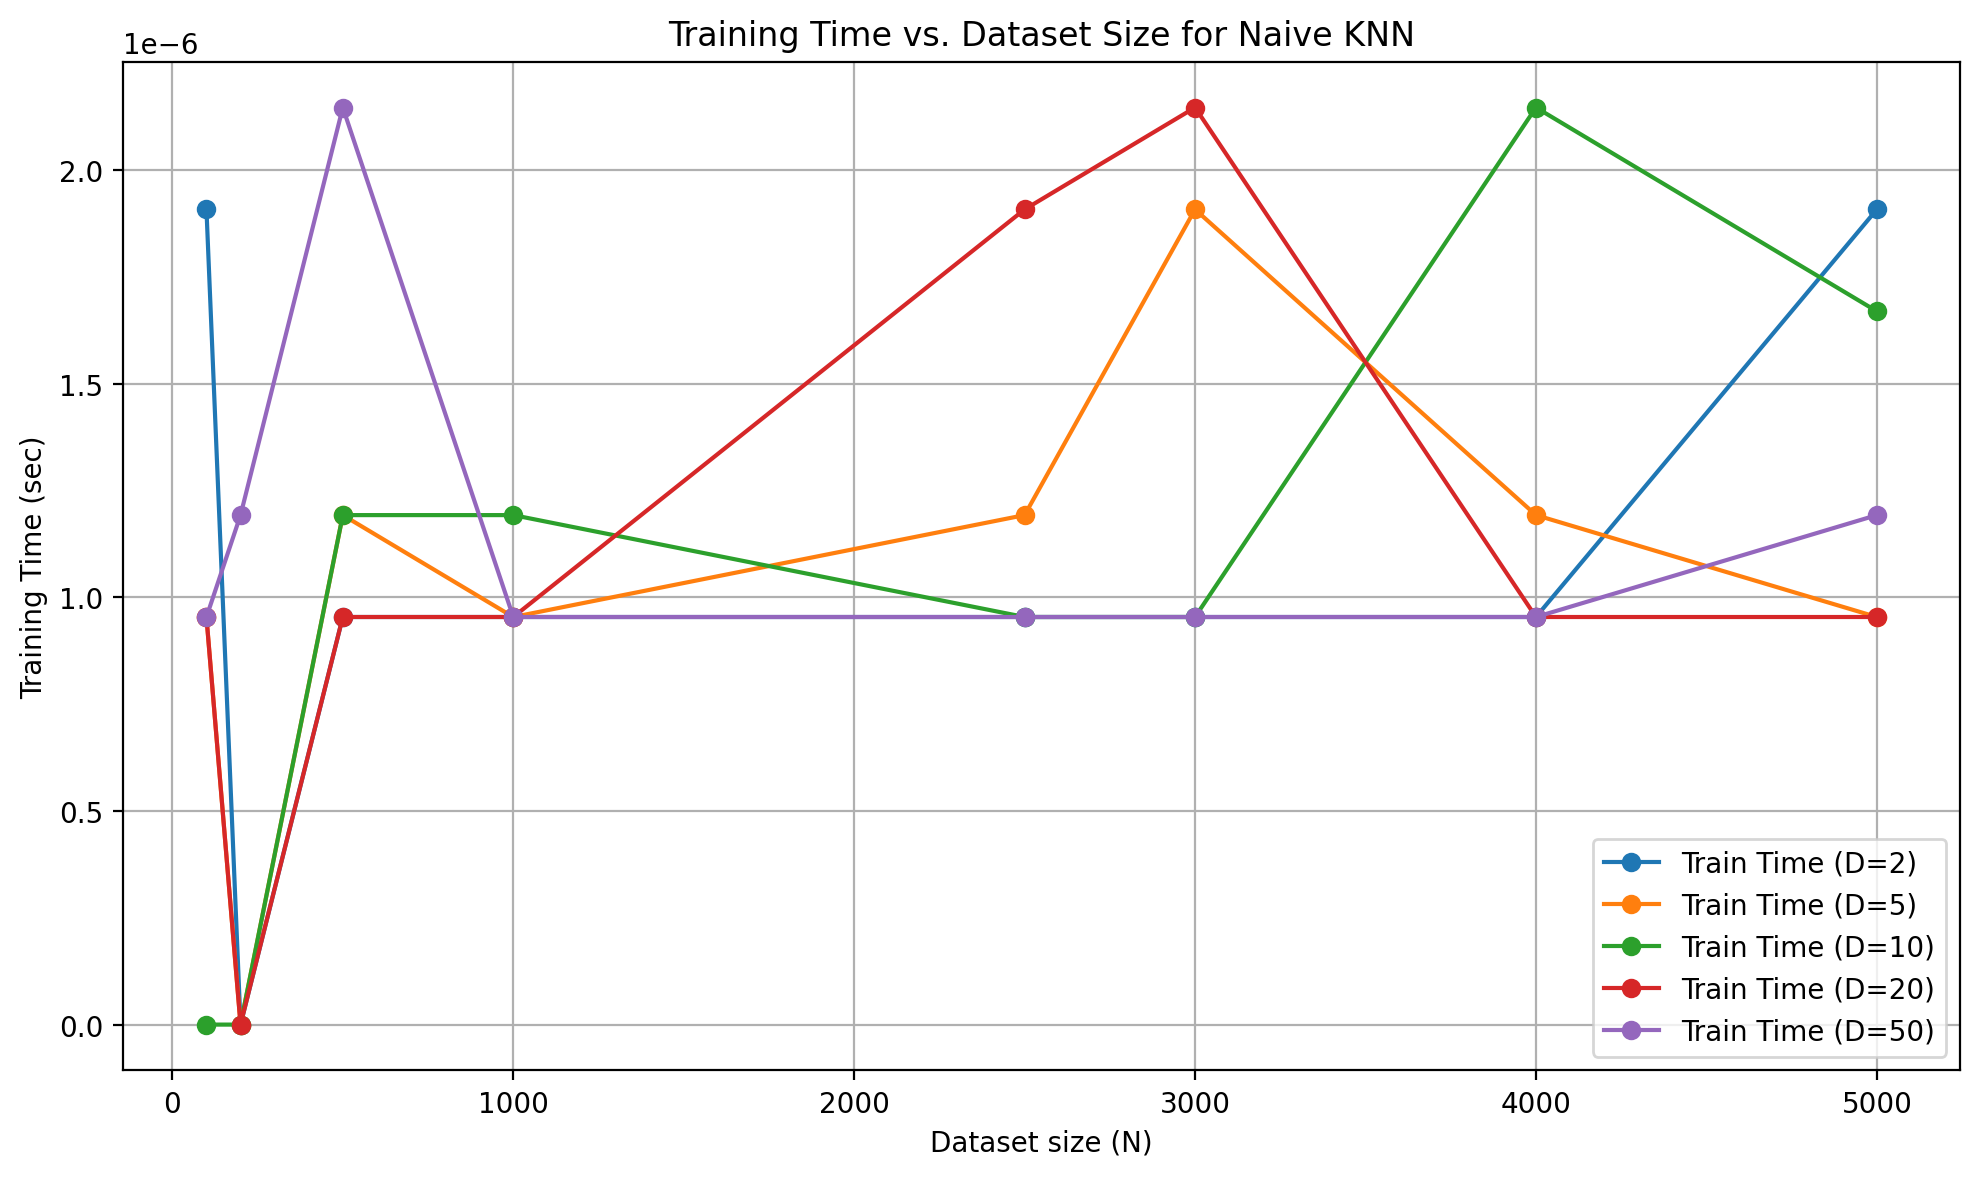

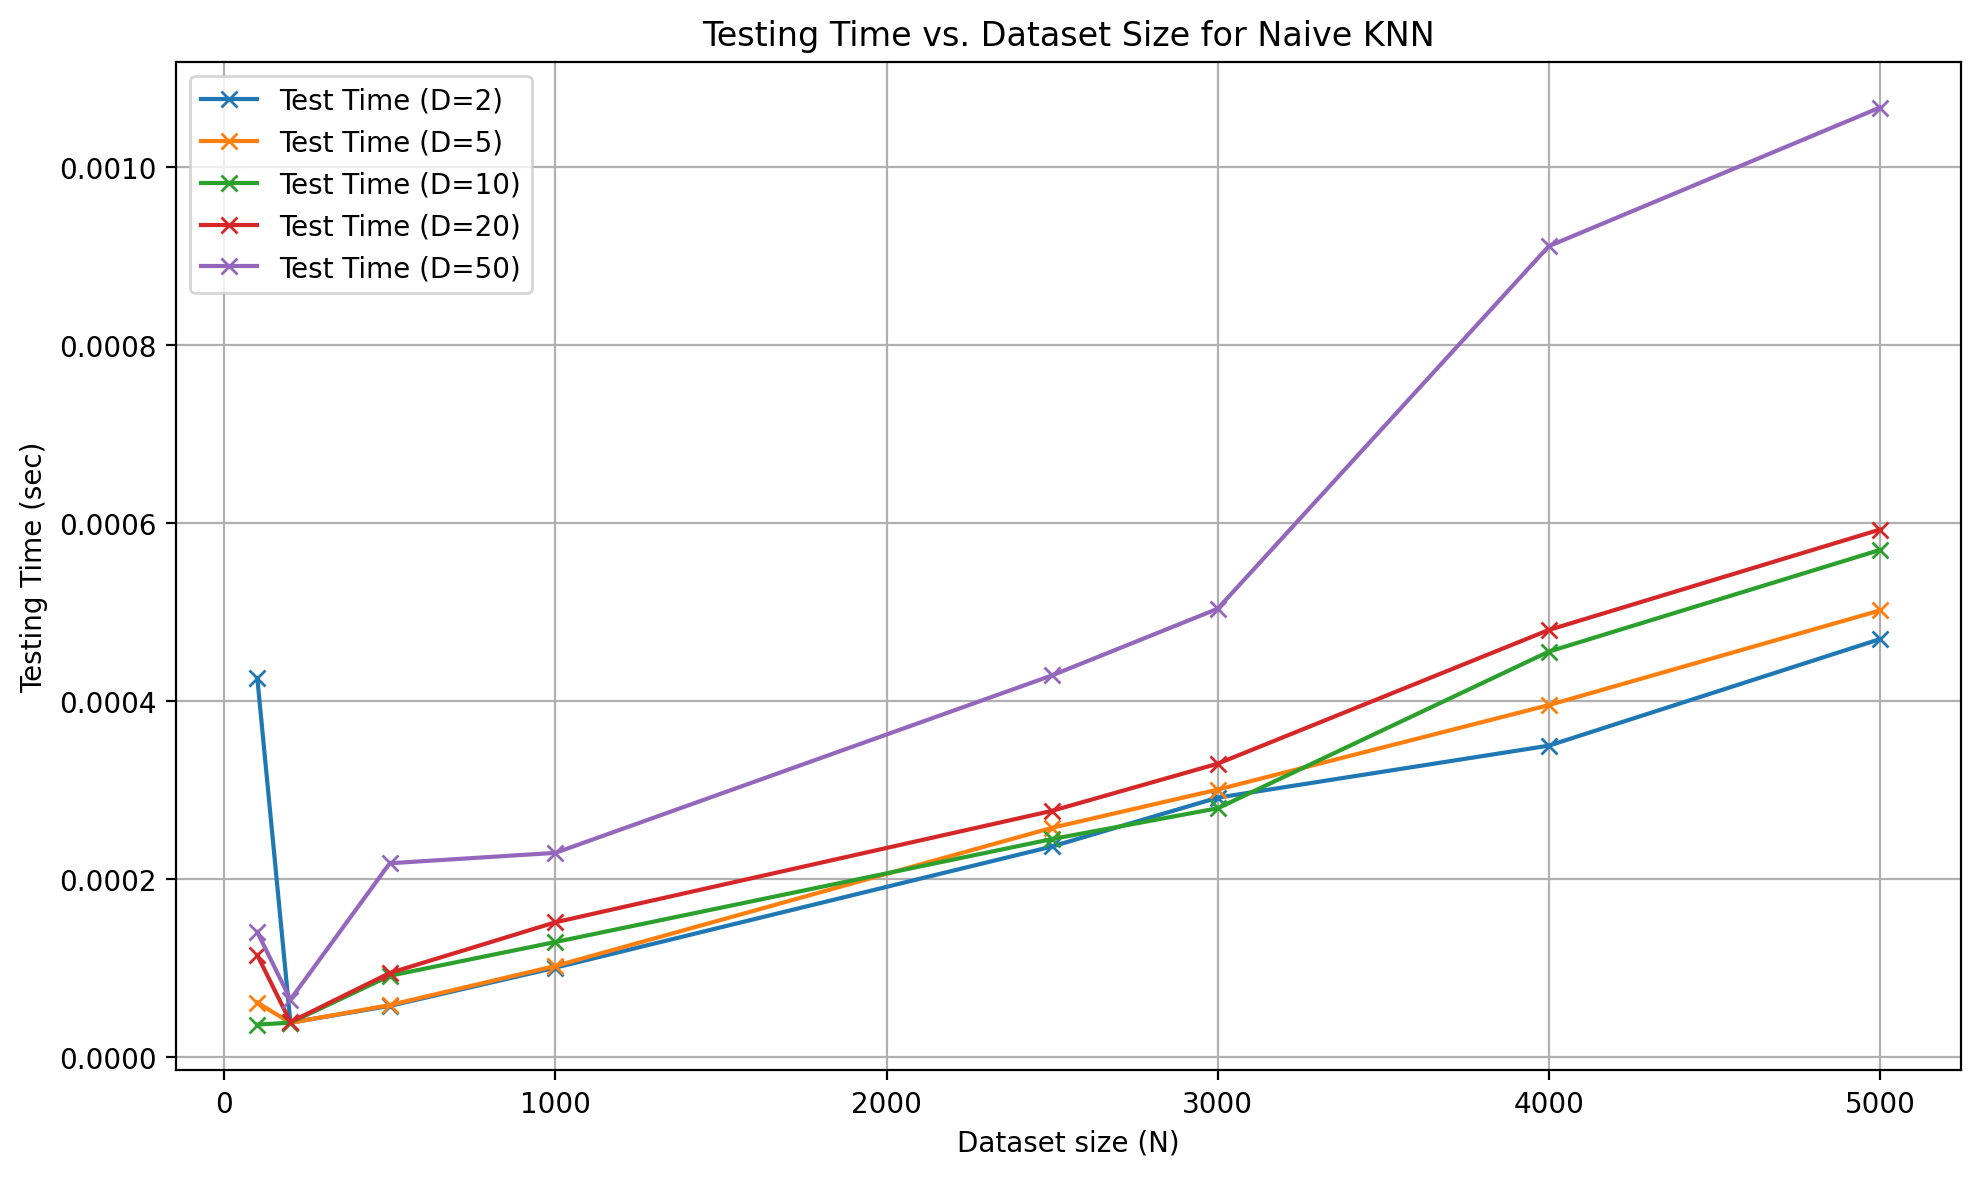

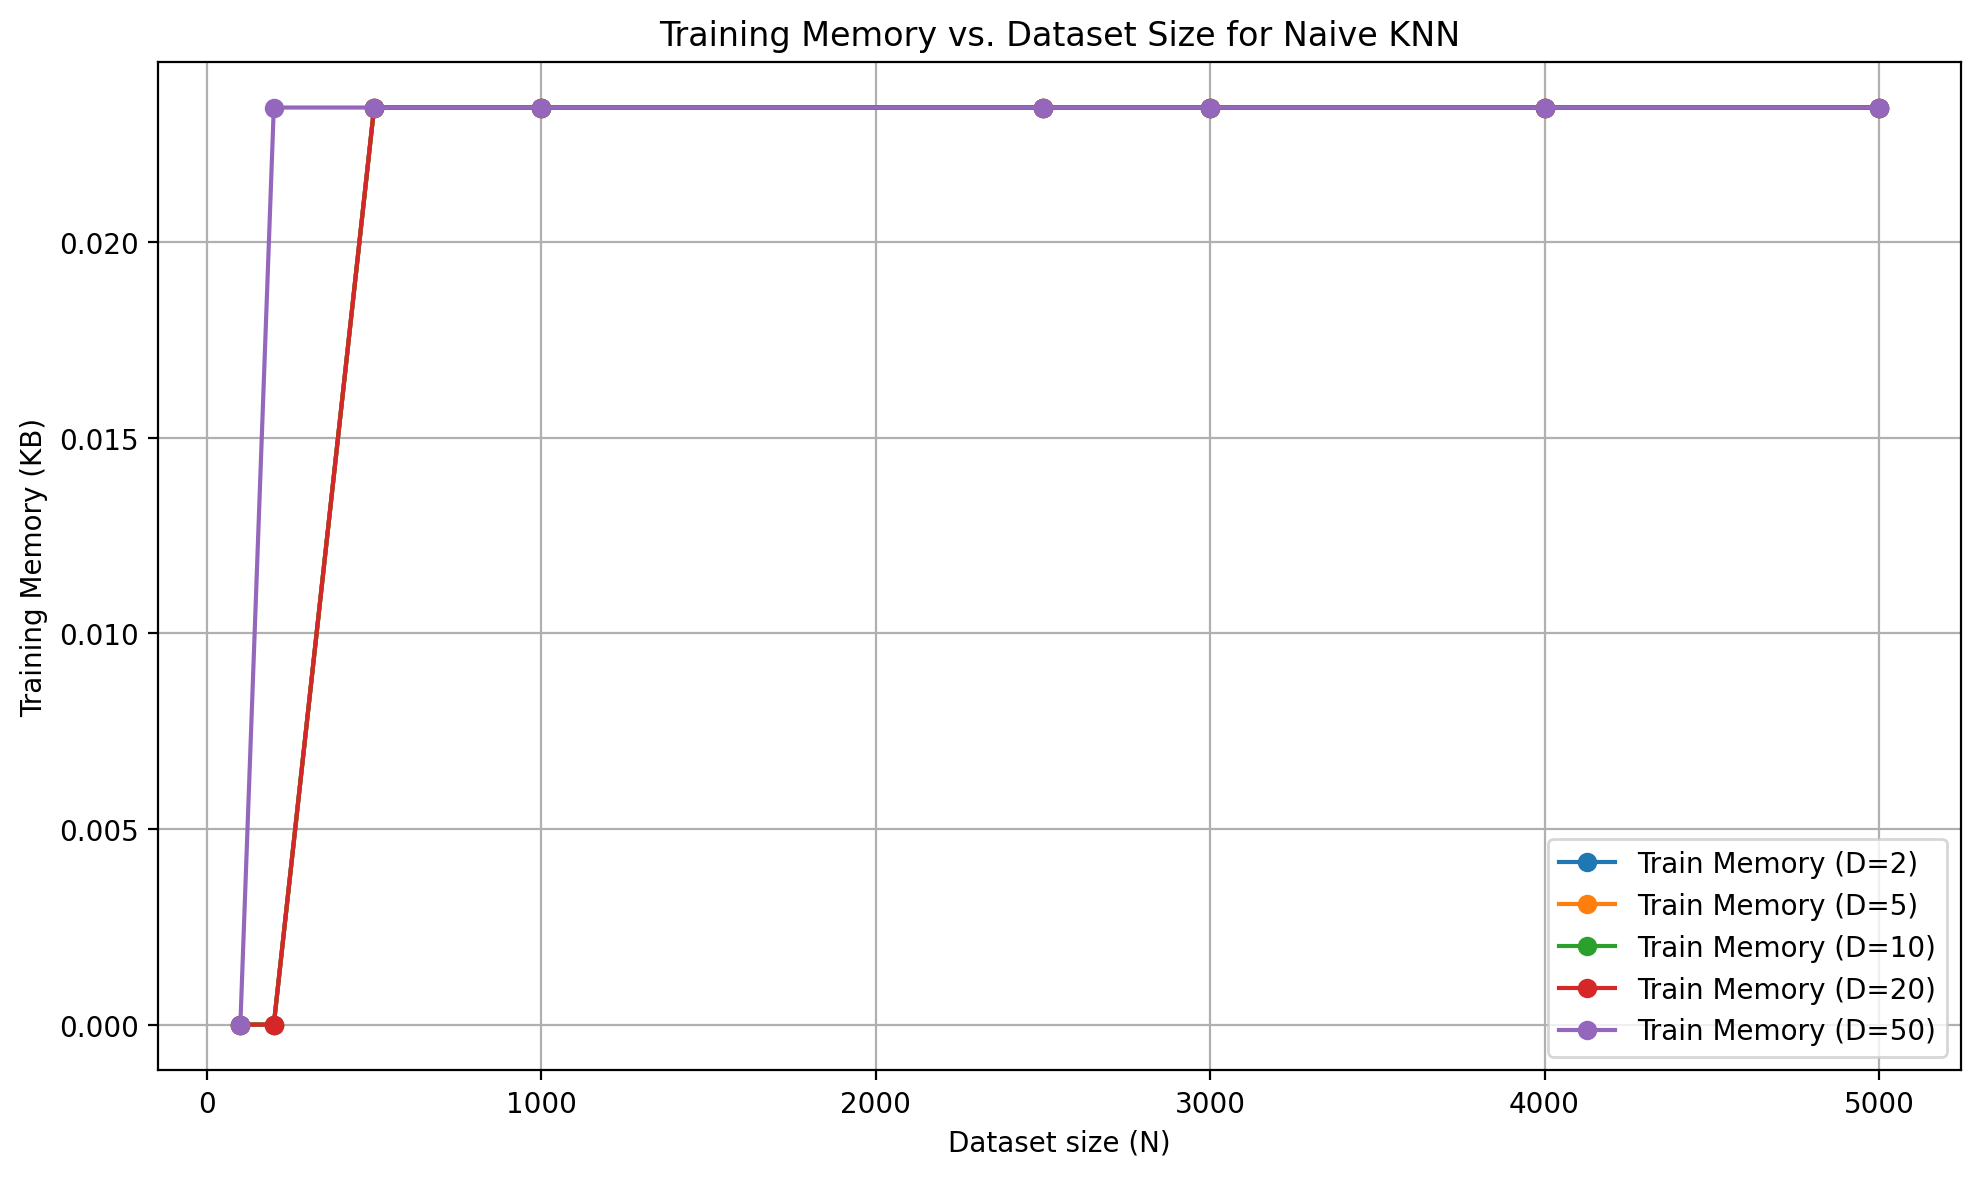

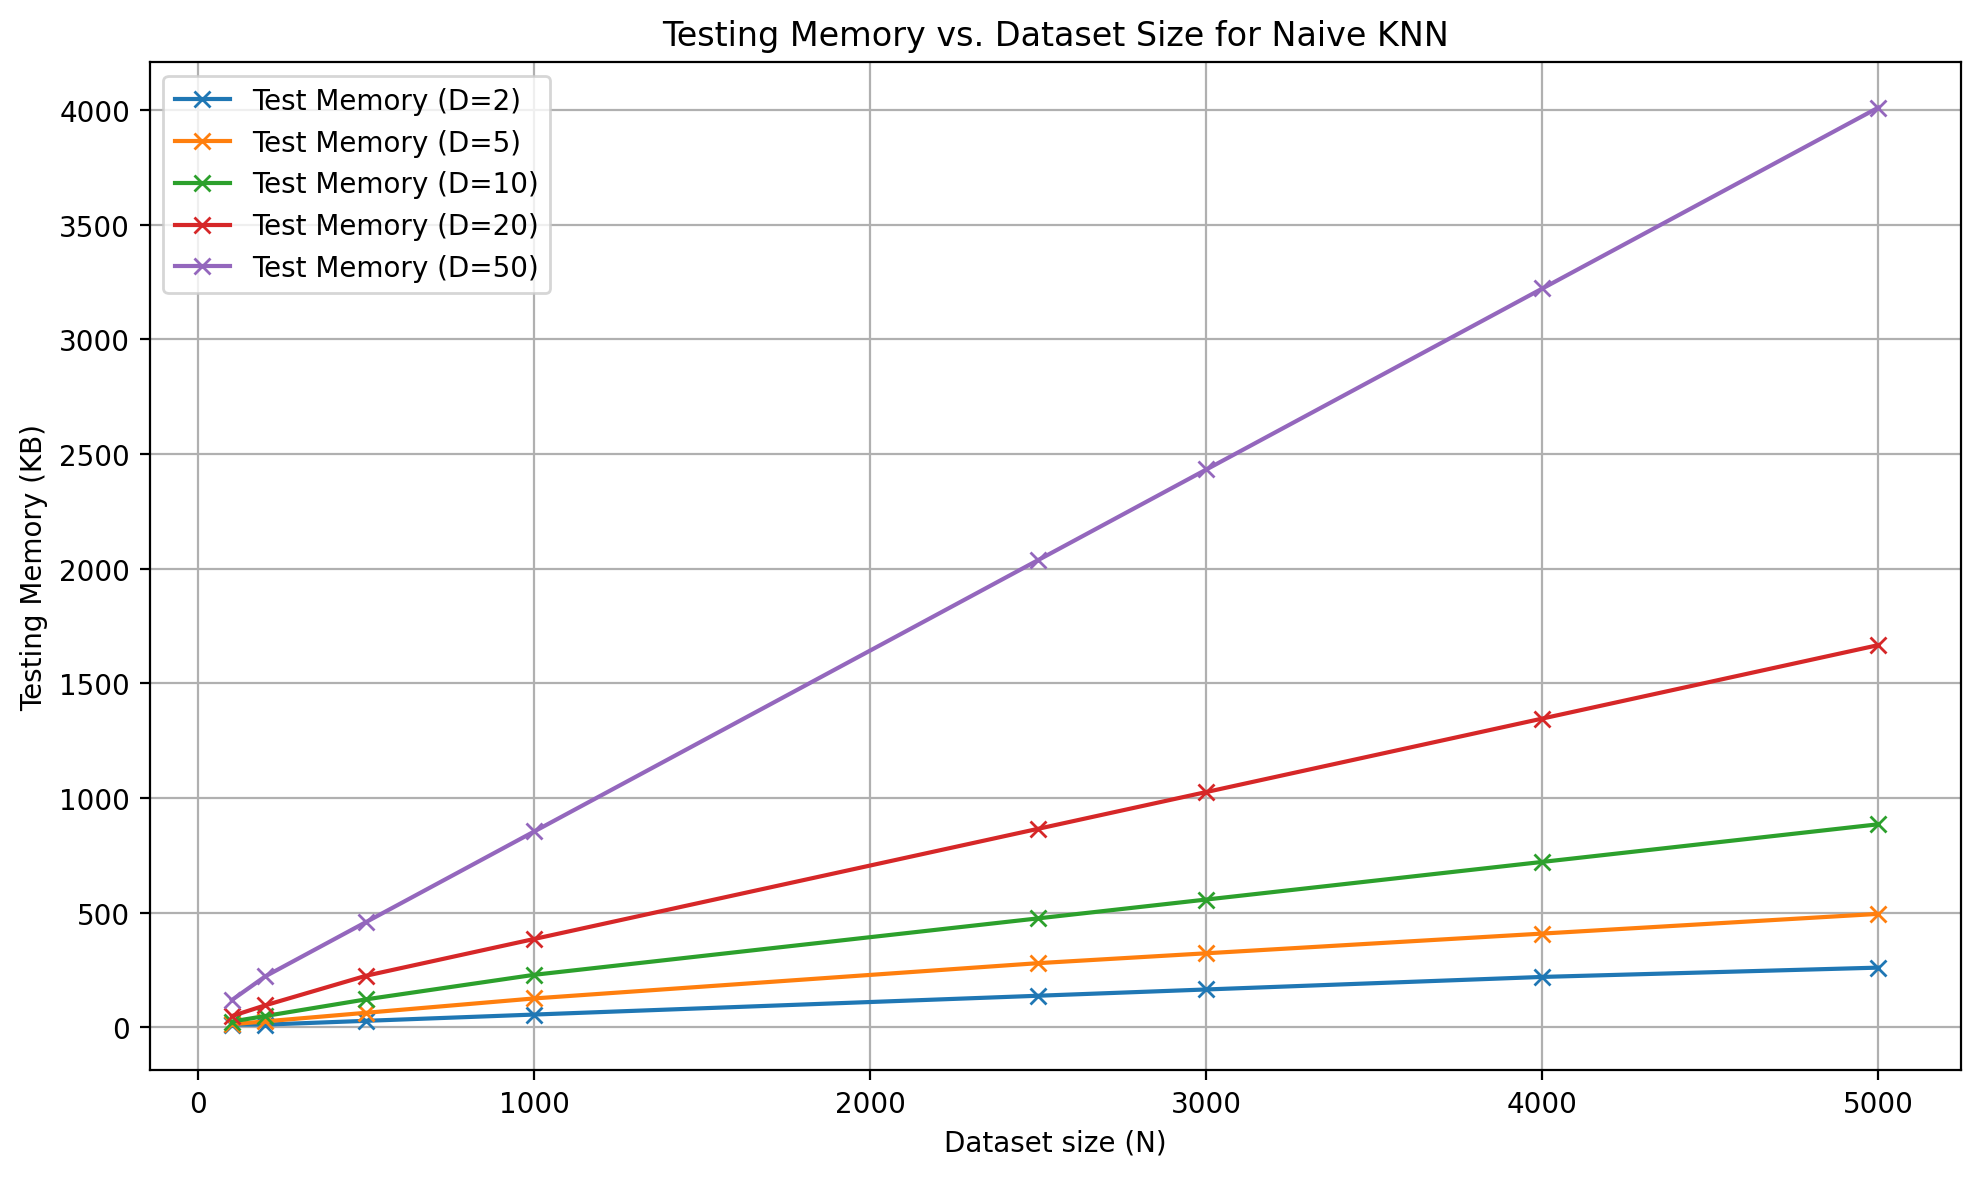

In [64]:


# Plot results
def plot_performance(performance_results, N_values, D_values):
    training_times = np.zeros((len(N_values), len(D_values)))
    testing_times = np.zeros((len(N_values), len(D_values)))
    training_memory = np.zeros((len(N_values), len(D_values)))
    testing_memory = np.zeros((len(N_values), len(D_values)))

    for i, N in enumerate(N_values):
        for j, D in enumerate(D_values):
            entry = next((x for x in performance_results if x['N'] == N and x['D'] == D), None)
            if entry:
                training_times[i, j] = entry['training_time']
                testing_times[i, j] = entry['testing_time']
                training_memory[i, j] = entry['training_memory']
                testing_memory[i, j] = entry['testing_memory']

    # Plot training and testing times
    plt.figure(figsize=(10, 6))
    for j, D in enumerate(D_values):
        plt.plot(N_values, training_times[:, j], marker='o', label=f'Train Time (D={D})')
    plt.xlabel('Dataset size (N)')
    plt.ylabel('Training Time (sec)')
    plt.title('Training Time vs. Dataset Size for Naive KNN')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    for j, D in enumerate(D_values):
        plt.plot(N_values, testing_times[:, j], marker='x', label=f'Test Time (D={D})')
    plt.xlabel('Dataset size (N)')
    plt.ylabel('Testing Time (sec)')
    plt.title('Testing Time vs. Dataset Size for Naive KNN')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot memory usage
    plt.figure(figsize=(10, 6))
    for j, D in enumerate(D_values):
        plt.plot(N_values, training_memory[:, j] / (1024), marker='o', label=f'Train Memory (D={D})')
    plt.xlabel('Dataset size (N)')
    plt.ylabel('Training Memory (KB)')
    plt.title('Training Memory vs. Dataset Size for Naive KNN')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    for j, D in enumerate(D_values):
        plt.plot(N_values, testing_memory[:, j] / (1024), marker='x', label=f'Test Memory (D={D})')
    plt.xlabel('Dataset size (N)')
    plt.ylabel('Testing Memory (KB)')
    plt.title('Testing Memory vs. Dataset Size for Naive KNN')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate and plot results
plot_performance(performance_results, N_values, D_values)